In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')
print(df.info())
print(df.isnull().sum())

numeric_cols = ["Sales", "Quantity", "Profit", "Discount"]
corr_matrix = df[numeric_cols].corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

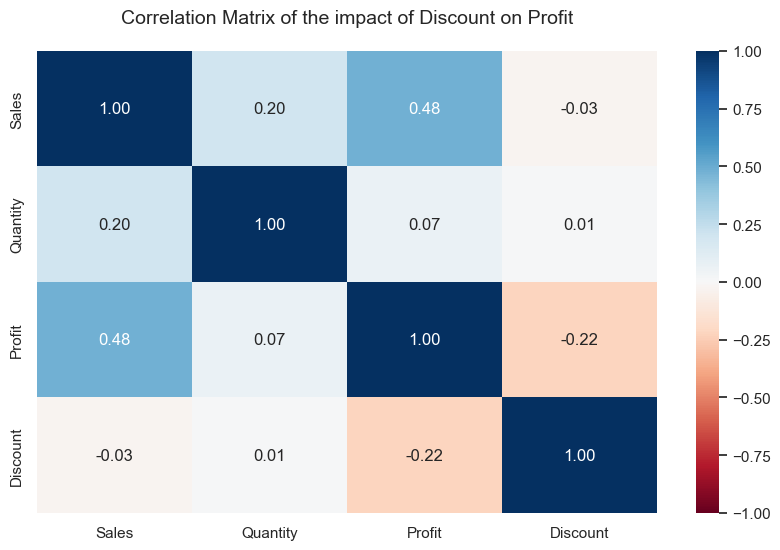

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix of the impact of Discount on Profit", fontsize=14, pad=20)
plt.show()

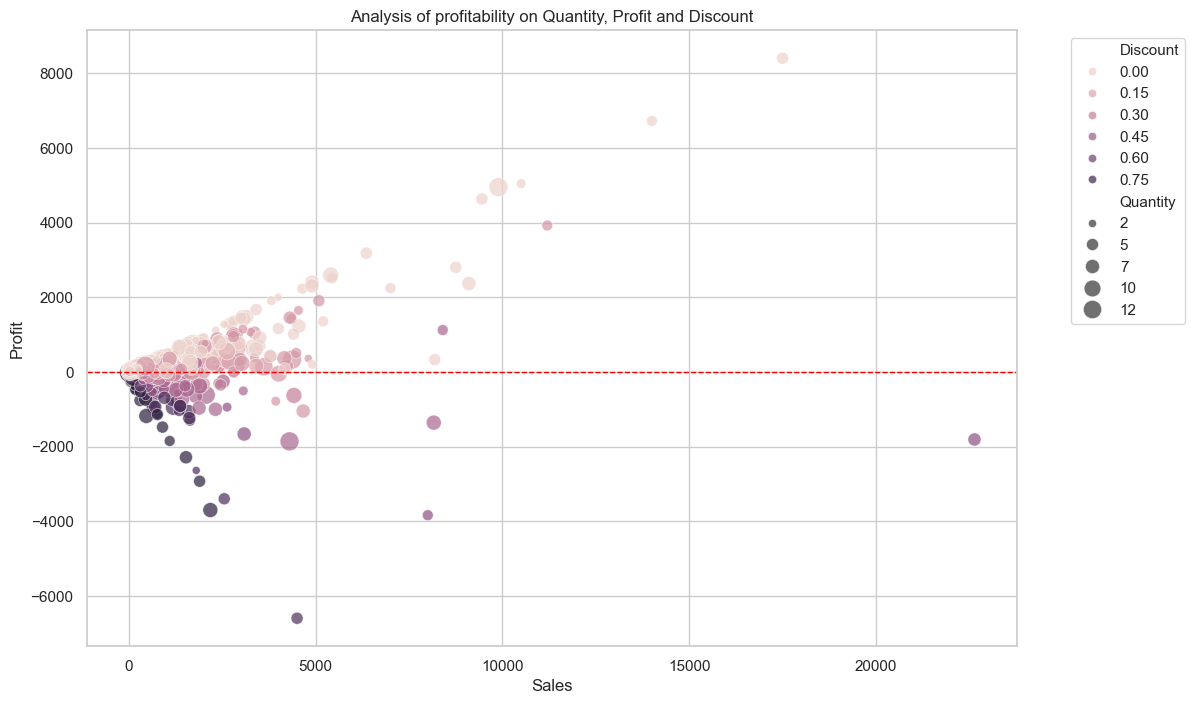

In [18]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df, 
    x="Sales", 
    y="Profit", 
    hue="Discount", 
    size="Quantity",
    sizes=(20, 200),
    alpha=0.7
)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Analysis of profitability on Quantity, Profit and Discount")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

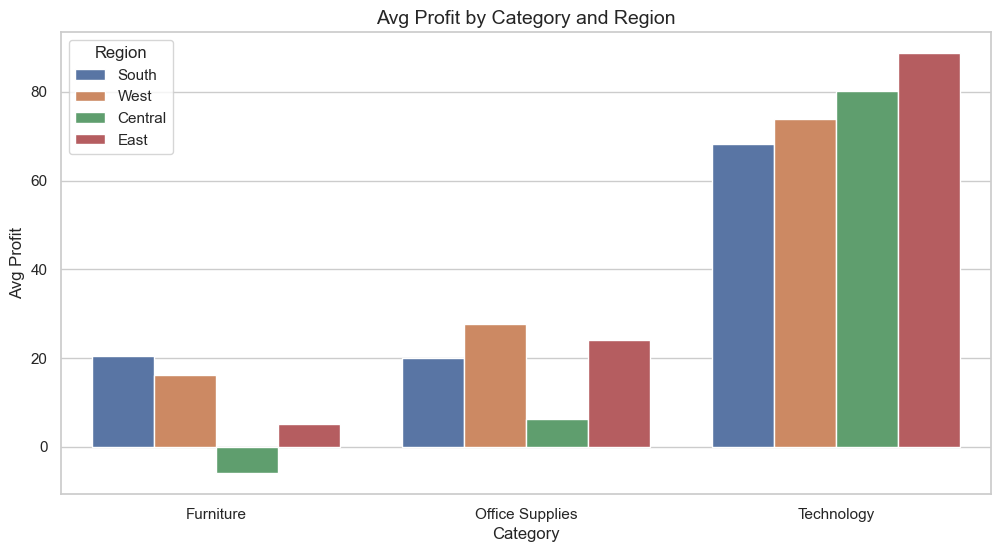

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Category", y="Profit", hue="Region", errorbar=None)
plt.title("Avg Profit by Category and Region", fontsize=14)
plt.ylabel("Avg Profit")
plt.show()

In [11]:
avg_profit_discount = df[df['Discount'] > 0]['Profit'].mean()
avg_profit_no_discount = df[df['Discount'] == 0]['Profit'].mean()

print(f"Average profit without discount : ${avg_profit_no_discount:.2f}")
print(f"Average profit with discount : ${avg_profit_discount:.2f}")
if avg_profit_discount < 0:
    print("The discounted products are in deficit on average")

Average profit without discount : $66.90
Average profit with discount : $-6.66
The discounted products are in deficit on average
